In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
# matplotlib.rcParams.update({'font.size': 16})

In [2]:
# matplotlib.rcParams.update({'font.size': 16})

# Setup

In [3]:
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
colors = ["#324F61", "#286F74", "#348F79", "#62AD70", "#A3C663", "#EFD85F",]

# File Reading

In [4]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [5]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=loglogalpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

def violinplot(x, yscale="log"): # TODO: Maybe check out how to remove the outliers or try seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

def hbtbplot(hb_t, tb_t, names, i_color=0):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(names))
    bar_width = 0.35

    if i_color >= 4:
        i_color = 0

    rectsHB = plt.bar(index, hb_t, bar_width, alpha=baralpha, color=colors[i_color], label="DCHB")
    rectsTB = plt.bar(index + bar_width, tb_t, bar_width, alpha=baralpha, color=colors[i_color+2], label="DCTB")

    plt.xlabel("Engine")
    plt.ylabel("Total time")
    plt.title("Engines times")
    plt.xticks(index + bar_width/2, names)
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()

# Determinant of the Covariance Matrix Computation Time 

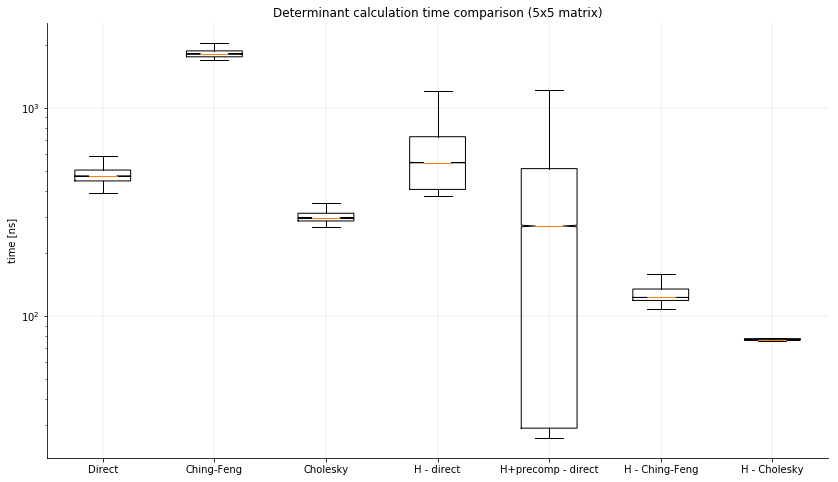

In [9]:
file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

org_arr = []
for file_name in ["org_det_ss-10e5/" + s + ".txt" for s in file_names]:
    org_arr.append(read_file(file_name))

cho_arr = []
for file_name in ["cho_det_ss-10e5/" + s + ".txt" for s in file_names]:
    cho_arr.append(read_file(file_name))

f_arr = []
for file_name in ["f_det_ss-10e5/" + s + ".txt" for s in file_names]:
    f_arr.append(read_file(file_name))

h_arr = []
h_arr.append(read_file("hardcoded_ss-10e5/noprecalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/precalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/chingfeng.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/cholesky.txt"))

ylabel = "time [ns]"

# title = "Determinant calculation of a nxn matrix through direct calculation"
# boxplot(org_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(org_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(org_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Cholesky decomposition"
# boxplot(cho_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(cho_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(cho_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Ching-Feng formula"
# boxplot(f_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(f_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(f_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")
title = "Determinant calculation time comparison (5x5 matrix)"
names = ["Direct", "Ching-Feng", "Cholesky", "H - direct", "H+precomp - direct", "H - Ching-Feng"]
names.append("H - Cholesky")
arrs  = [org_arr[4]*10e5, f_arr[4]*10e5, cho_arr[4]*10e5, h_arr[0]*10e5, h_arr[1]*10e5, h_arr[2]*10e5]
arrs.append(h_arr[3]*10e5)
boxplot(arrs, names, ylabel, title, showfliers=False, yscale="log")

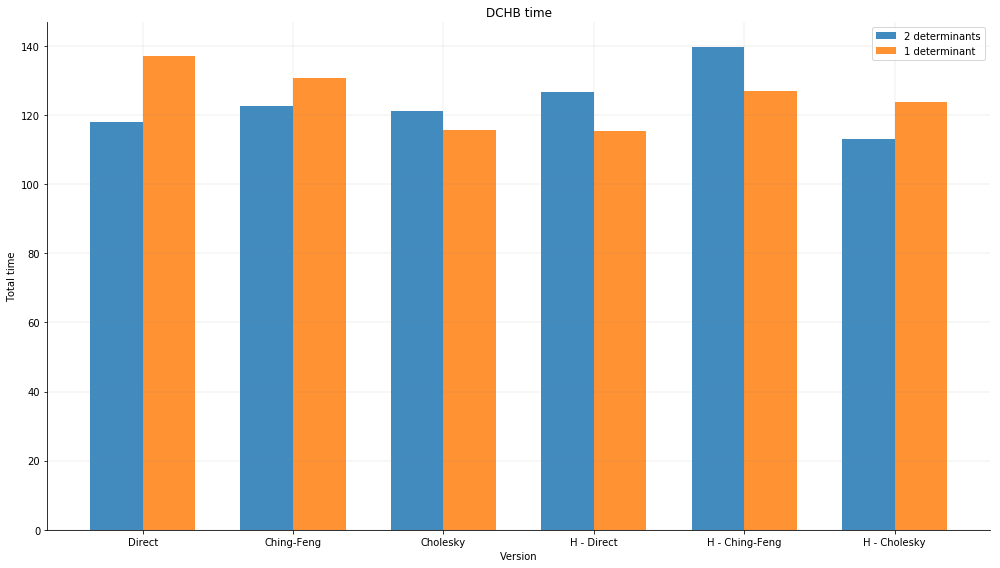

In [11]:
names      = ["Direct", "Ching-Feng", "Cholesky", "H - Direct", "H - Ching-Feng", "H - Cholesky"]
times_2det = np.array([117.87, 122.54, 121.11, 126.63, 139.82, 113.19])
times_1det = np.array([137.08, 130.58, 115.54, 115.50, 126.87, 123.80])

# TODO: Start with this plot in my thesis when comparing versions
fig, ax = plt.subplots()

fig.set_size_inches(plot_size)
index = np.arange(len(names))
bar_width = 0.35

rects2det = plt.bar(index, times_2det, bar_width, alpha=baralpha, label="2 determinants")
rects1det = plt.bar(index + bar_width, times_1det, bar_width, alpha=baralpha, label="1 determinant")

plt.xlabel("Version")
plt.ylabel("Total time")
plt.title("DCHB time")
plt.xticks(index + bar_width/2, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

# Engine Times

Version:
* v1.0: Original JLab version
* v1.1: Refactored and micro-optimized
* v1.2: Sherman-Morrison formula implementated
* v1.3: Cholesky decomposition implemented
* v1.4.1: Multithreaded track finding
* v1.4.2: Multithreaded cluster finding
* v1.5: Current status

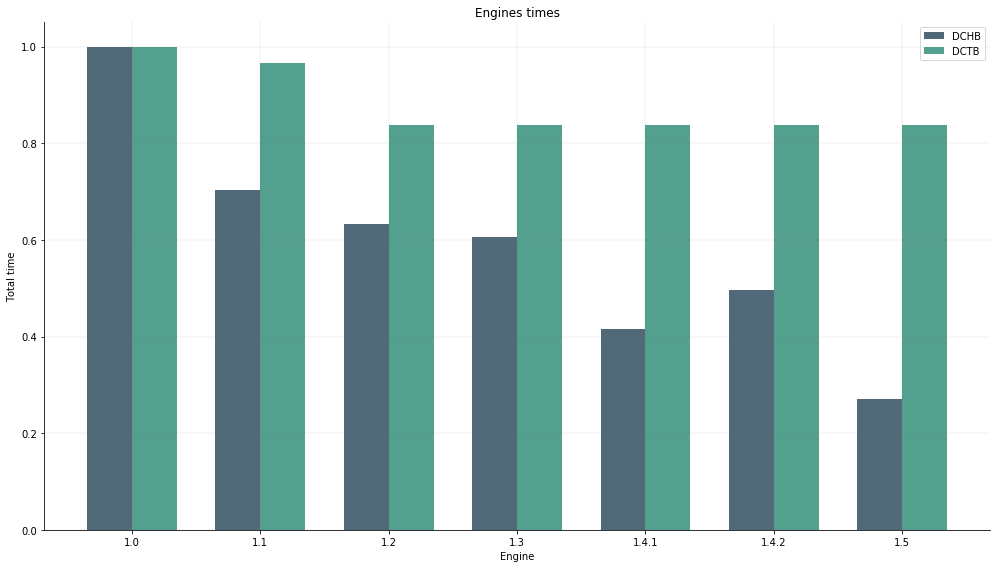

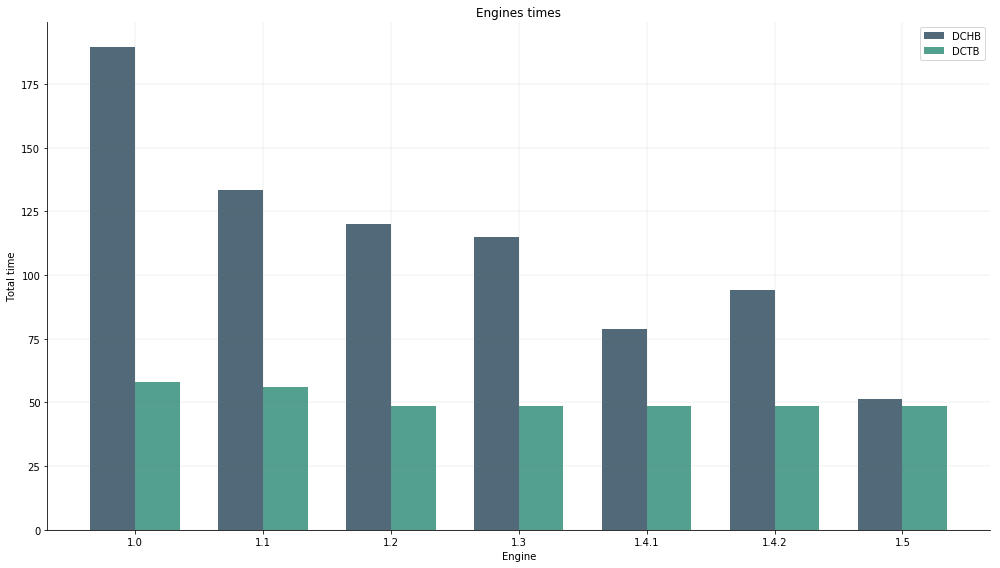

In [10]:
versions = ["1.0", "1.1", "1.2", "1.3", "1.4.1", "1.4.2", "1.5"]
hb_t     = np.array([189.75, 133.52, 120.02, 114.80, 78.66, 94.27, 51.18]) # UPDATE
tb_t     = np.array([ 58.18,  56.24,  48.78,  48.78, 48.78, 48.78, 48.78]) # UPDATE

# TODO: Start with this plot in my thesis when comparing versions
hbtbplot(hb_t/hb_t[0], tb_t/tb_t[0], versions, i_color=0)
hbtbplot(hb_t, tb_t, versions, i_color=0)

# Simulated magfield chi^2 probability

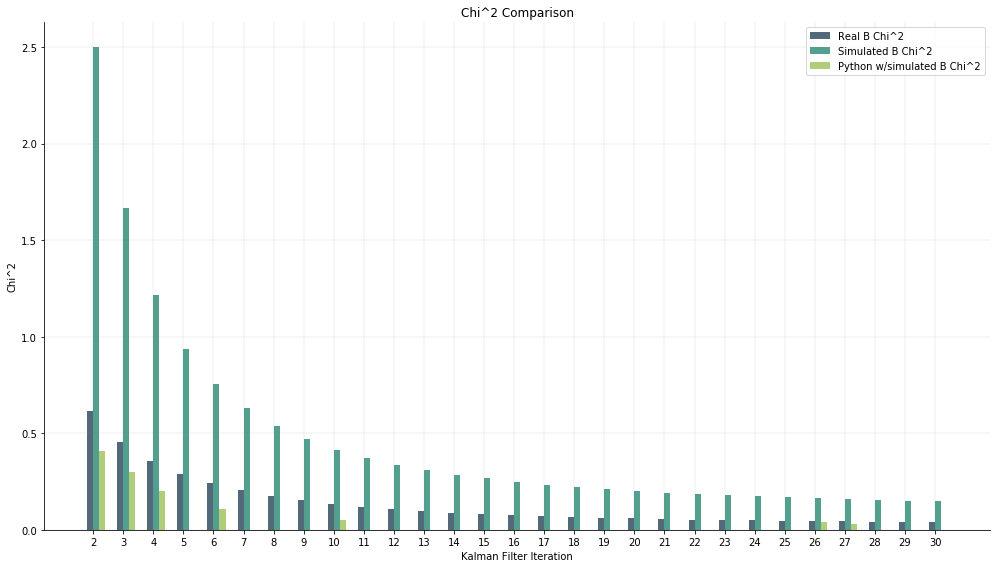

In [16]:
names = ["2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",
         "21","22","23","24","25","26","27","28","29","30"]
real_B   = np.array([0.61629,0.45469,0.35774,0.29064,0.24144,0.20427,0.17552,0.15288,0.13473,0.11999,0.10785,
                     0.09776,0.08927,0.08208,0.07594,0.07066,0.06608,0.06209,0.05860,0.05553,0.05281,0.05040,
                     0.04826,0.04633,0.04461,0.04306,0.04165,0.04038,0.03923])
sim_B    = np.array([2.50277,1.66884,1.21584,0.93721,0.75332,0.62841,0.53736,0.46840,0.41501,0.37262,0.33803,
                     0.30962,0.28595,0.26603,0.24908,0.23454,0.22197,0.21103,0.20144,0.19299,0.18550,0.17882,
                     0.17283,0.16780,0.16295,0.15855,0.15456,0.15092,0.14759])
python_B = np.array([0.41, 0.30, 0.20, 0., 0.11, 0., 0., 0., 0.05, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 
                     0., 0., 0., 0., 0.04, 0.03, 0., 0., 0.])

fig, ax = plt.subplots()
    
fig.set_size_inches(plot_size)
index = np.arange(len(names))
bar_width = 0.2

i_color = 0
if i_color >= 4:
    i_color = 0

rects1 = plt.bar(index, real_B, bar_width, alpha=baralpha, color=colors[i_color], label="Real B Chi^2")
rects2 = plt.bar(index + bar_width, sim_B, bar_width, alpha=baralpha, color=colors[i_color+2], label="Simulated B Chi^2")
rects3 = plt.bar(index + 2*bar_width, python_B, bar_width, alpha=baralpha, color=colors[i_color+4], label="Python w/simulated B Chi^2")
plt.xlabel("Kalman Filter Iteration")
plt.ylabel("Chi^2")
plt.title("Chi^2 Comparison")
plt.xticks(index + bar_width/2, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

# Time per engine (20180907):

In [ ]:
def enginesplot(x, y, colors, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    y_pos = np.arange(len(x))
    plt.barh(y_pos, y, color=colors, align='center', alpha=baralpha)
    plt.yticks(y_pos, x)
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title(title)

    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.show()
# 20180907
names = [
    "READER"    , "MAGFIELDS" , "FTCAL"     , "FTHODO"    ,
    "FTEB"      , "DCHB"      , "FTOFHB"    , "EC"        ,
    "CVT"       , "CTOF"      , "CND"       , "HTCC"      ,
    "LTCC"      , "RICH"      , "EBHB"      , "DCTB"      ,
    "FTOFTB"    , "EBTB"      , "WRITER"
]
times = np.array([
      0.11,   0.01,   0.94,   0.87,
      0.70, 173.50,   1.14,   1.00,
     19.87,   1.23,   1.56,   0.57,
      0.29,   0.14,   1.60,  47.55,   
      1.17,   1.88,   1.85
])/255.98
colors = [
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#d93223", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#d93223",
    "#c6c3ba", "#c6c3ba", "#c6c3ba"
]

enginesplot(names, times, colors, "Engine Name", "Engine Time / Total Time", "Engine Times")